# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

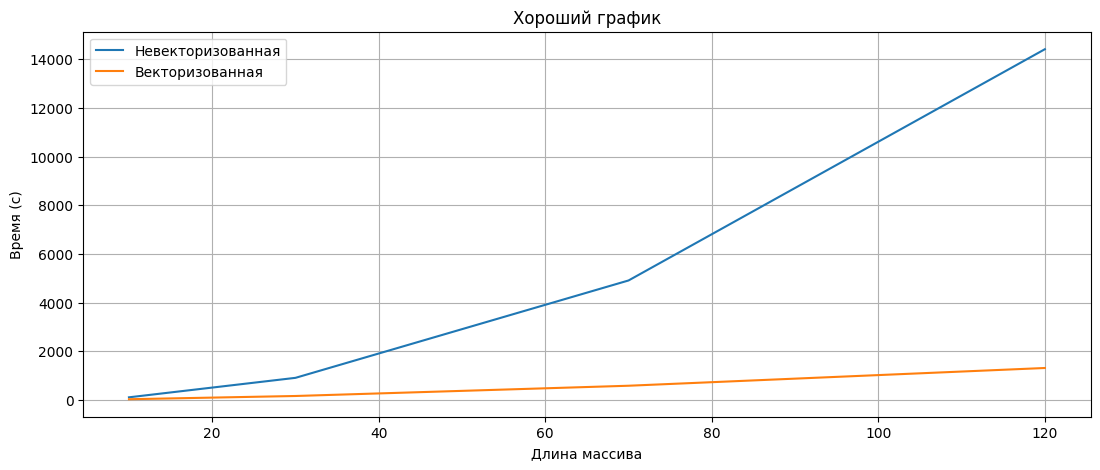

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, ax2 = plt.subplots(1, figsize=(13, 5))



ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

/tmp/ipython-input-3982305434.py:26: RuntimeWarning: overflow encountered in scalar multiply
  p = p*d[i]


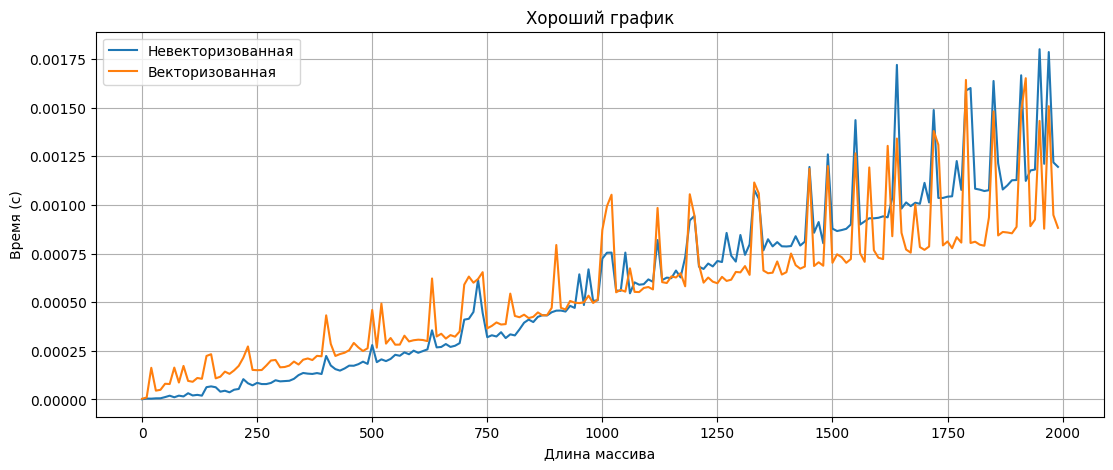

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import random
from time import time
def f(sz):
  matrix = [[random.randint(0,100) for _ in range(sz)] for _ in range(sz)]
  return matrix
def f1(sz):
  matrix = np.random.randint(0, 100, size=(sz, sz))
  return matrix
def nonvect(matrix):
  st = time()
  p = 1
  for i in range(len(matrix)):
    if(matrix[i][i] > 0):
      p = p*matrix[i][i]
  f = time()
  vl = f - st
  return vl
def vect(matrix):
  st = time()
  d = matrix.diagonal()
  p = 1
  for i in range(len(d)):
    if d[i] > 0:
      p = p*d[i]
  f = time()
  return f - st

%matplotlib inline

data_size = np.arange(200)
for i in range (200):
  data_size[i] *= 10
time_non_vectorized = [0 for i in range(len(data_size))]
time_vectorized = [0 for i in range(len(data_size))]
for i in range(len(data_size)):
  time_non_vectorized[i] = nonvect(f(data_size[i]))
  time_vectorized[i] = vect(f1(data_size[i]))

f, ax2 = plt.subplots(1, figsize=(13, 5))



ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()



* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


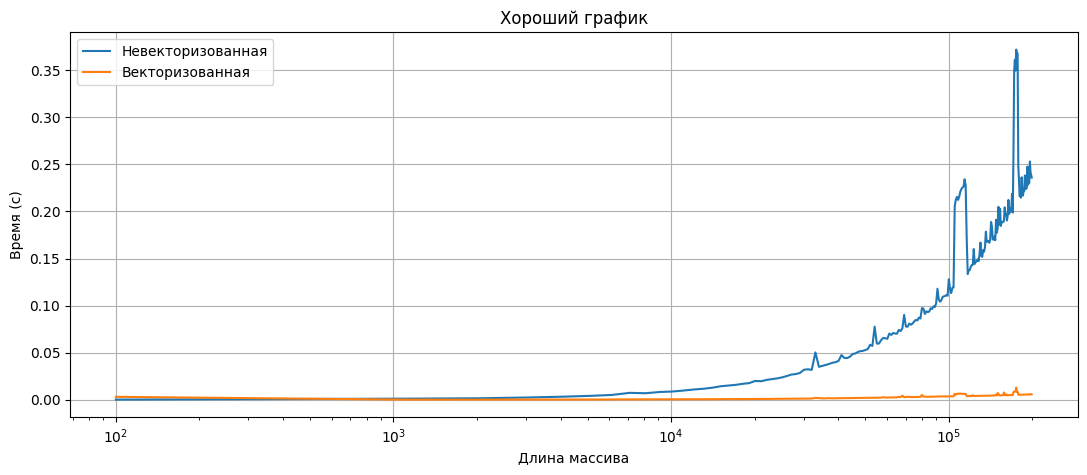

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from time import time
x_len, y_simple_time, y_np_time = [], [], []
for n in range(100, 200000, 1000):
  A = np.random.randint(-1000, 1000, size=n)
  B = np.random.randint(-1000, 1000, size=n)
  x_len.append(n)
  def solve_simple(a, b):
    return sorted(a) == sorted(b)
  def solve_np(a, b):
    return np.equal(np.sort(a), np.sort(b))
  t_a_begin = time()
  solve_simple(list(A), list(B))
  t_a_end = time()
  t_b_begin = time()
  solve_np(A, B)
  t_b_end = time()
  y_simple_time.append(t_a_end - t_a_begin)
  y_np_time.append(t_b_end - t_b_begin)
f, ax2 = plt.subplots(1, figsize=(13, 5))

ax2.plot(x_len, y_simple_time, label=u"Невекторизованная")
ax2.plot(x_len, y_np_time, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

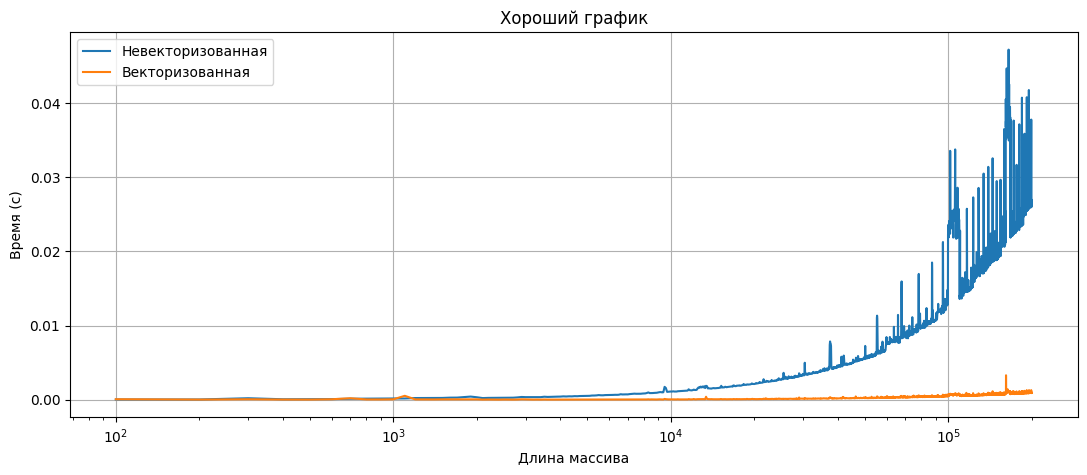

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from time import time
x_len, y_simple_time, y_np_time = [], [], []
for n in range(100, 200000, 100):
  A = np.random.randint(-1000, 1000, size=n)
  x_len.append(n)
  def solve_simple(a):
    ans = -10000
    for i in range(1, len(a)):
      if not a[i - 1]:
        ans = max(ans, a[i])
    return ans
  def solve_np(a):
    mask = np.zeros_like(a, dtype=bool)
    mask[1:] = a[:-1] != 0
    return np.max(a[mask])
  t_a_begin = time()
  solve_simple(list(A))
  t_a_end = time()
  t_b_begin = time()
  solve_np(A)
  t_b_end = time()
  y_simple_time.append(t_a_end - t_a_begin)
  y_np_time.append(t_b_end - t_b_begin)
f, ax2 = plt.subplots(1, figsize=(13, 5))

ax2.plot(x_len, y_simple_time, label=u"Невекторизованная")
ax2.plot(x_len, y_np_time, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()



* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


FileNotFoundError: No such file: '/content/Putin.png'

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

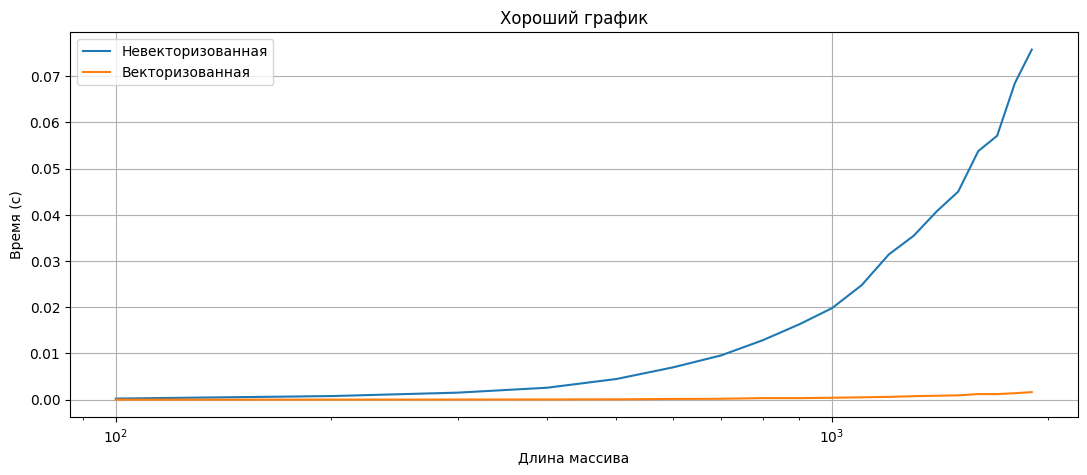

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from time import time
x_len, y_simple_time, y_np_time = [], [], []
for n in range(100, 2000, 100):
  A = np.random.randint(-1000, 1000, size=n)
  B = np.random.randint(0, n, size=n)
  x_len.append(n)
  def solve_simple(a, b):
    ans = []
    for i in range(n):
      for j in range(b[i]):
        ans.append(a[i])
    return ans
  def solve_np(a, b):
    return np.repeat(a, b)
  t_a_begin = time()
  solve_simple(list(A), list(B))
  t_a_end = time()
  t_b_begin = time()
  solve_np(A, B)
  t_b_end = time()
  y_simple_time.append(t_a_end - t_a_begin)
  y_np_time.append(t_b_end - t_b_begin)
f, ax2 = plt.subplots(1, figsize=(13, 5))

ax2.plot(x_len, y_simple_time, label=u"Невекторизованная")
ax2.plot(x_len, y_np_time, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()



* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

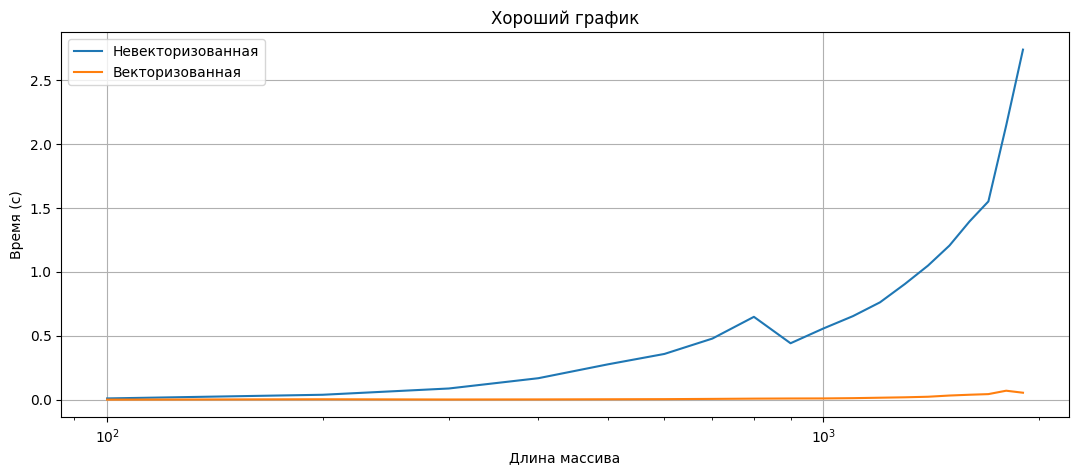

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
from math import sqrt
from time import time
x_len, y_simple_time, y_np_time = [], [], []
for n in range(100, 2000, 100):
  X = np.random.randint(-1000, 1000, size=n)
  Y = np.random.randint(-1000, 1000, size=n)
  x_len.append(n)
  def solve_simple(X, Y):
    return [[sqrt((X[j] - X[i]) * (X[j] - X[i]) + (Y[j] - Y[i]) * (Y[j] - Y[i])) for j in range(n)] for i in range(n)]
  def solve_np(X, Y):
    X = Y[:, None] - X
    Y = Y[:, None] - Y
    return np.sqrt(X ** 2 + Y ** 2)
  t_a_begin = time()
  solve_simple(list(X), list(Y))
  t_a_end = time()
  t_b_begin = time()
  solve_np(X, Y)
  t_b_end = time()
  y_simple_time.append(t_a_end - t_a_begin)
  y_np_time.append(t_b_end - t_b_begin)
f, ax2 = plt.subplots(1, figsize=(13, 5))

ax2.plot(x_len, y_simple_time, label=u"Невекторизованная")
ax2.plot(x_len, y_np_time, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xscale("log", base=10)
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.